In [1]:
include("../src/utilities.jl");

In [2]:
using PyPlot

In [3]:
data_dir = "../data/fidelity_open_system/";

In [4]:
t_11, state_11, params_11 = load_state_jld("$(data_dir)state_1_1_fidelity_open_system.jld2")
t_12, state_12, params_12 = load_state_jld("$(data_dir)state_1_2_fidelity_open_system.jld2")
t_21, state_21, params_21 = load_state_jld("$(data_dir)state_2_1_fidelity_open_system.jld2")
t_22, state_22, params_22 = load_state_jld("$(data_dir)state_2_2_fidelity_open_system.jld2")
t_cs, state_cs, params_cs = load_state_jld("$(data_dir)state_cs_fidelity_open_system.jld2");

In [5]:
state_11_m = project_qubit("x_minus", state_11);

In [6]:
state_12_m = project_qubit("x_minus", state_12);

In [7]:
state_21_m = project_qubit("x_minus", state_21);

In [8]:
state_22_m = project_qubit("x_minus", state_22);

In [9]:
state_cs_m = project_qubit("x_minus", state_cs);

In [10]:
t_fid_11, fid_11 = fidelity_over_time(t_11, state_cs_m, state_11_m);

In [11]:
t_fid_12, fid_12 = fidelity_over_time(t_11, state_cs_m, state_12_m);

In [12]:
t_fid_21, fid_21 = fidelity_over_time(t_21, state_cs_m, state_21_m);

In [13]:
t_fid_22, fid_22 = fidelity_over_time(t_22, state_cs_m, state_22_m);

In [14]:
t_scaled = t_fid_11.*params_11[:sys_params]["g_2"]; #Same for all

In [15]:
frac_q11 = params_11[:decay_rates]["qubit_decay"]/params_11[:sys_params]["g_2"]
frac_phi11 = params_11[:decay_rates]["qubit_dephase"]/params_11[:sys_params]["g_2"]
frac_q12 = params_12[:decay_rates]["qubit_decay"]/params_12[:sys_params]["g_2"]
frac_phi12 = params_12[:decay_rates]["qubit_dephase"]/params_12[:sys_params]["g_2"]
frac_q21 = params_21[:decay_rates]["qubit_decay"]/params_21[:sys_params]["g_2"]
frac_phi21 = params_21[:decay_rates]["qubit_dephase"]/params_21[:sys_params]["g_2"]
frac_q22 = params_22[:decay_rates]["qubit_decay"]/params_22[:sys_params]["g_2"]
frac_phi22 = params_22[:decay_rates]["qubit_dephase"]/params_22[:sys_params]["g_2"];

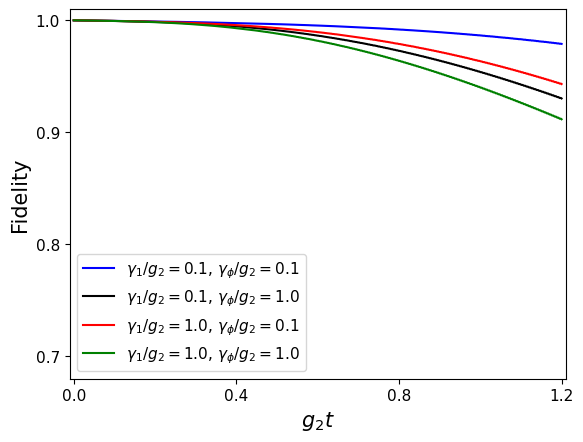

PyObject <matplotlib.legend.Legend object at 0x197578a30>

In [16]:
PyPlot.plot(t_scaled, fid_11, label=L"\gamma_1/g_2 = " * "$(frac_q11), " * L"\gamma_\phi/g_2 = " * "$(frac_phi11)", color="blue")
PyPlot.plot(t_scaled, fid_12, label=L"\gamma_1/g_2 = " * "$(frac_q12), " * L"\gamma_\phi/g_2 = " * "$(frac_phi12)", color="black")
PyPlot.plot(t_scaled, fid_21, label=L"\gamma_1/g_2 = " * "$(frac_q21), " * L"\gamma_\phi/g_2 = " * "$(frac_phi21)", color="red")
PyPlot.plot(t_scaled, fid_22, label=L"\gamma_1/g_2 = " * "$(frac_q22), " * L"\gamma_\phi/g_2 = " * "$(frac_phi22)", color="green")
PyPlot.ylim(0.68, 1.01)
PyPlot.xlim(-0.01, 1.21)
PyPlot.xlabel(L"g_2 t", fontsize=15)
PyPlot.ylabel("Fidelity", fontsize=15)
PyPlot.plot(grid=false, framestyle=:box)
PyPlot.xticks(ticks=[0.0, 0.4,  0.8,  1.2], fontsize=11)
PyPlot.yticks(ticks=[0.7, 0.8, 0.9, 1.0], fontsize=11)
PyPlot.legend(loc="best", fontsize=11)

In [17]:
gridvec = [-5.0:0.05:5.0;];
lim = maximum(gridvec);

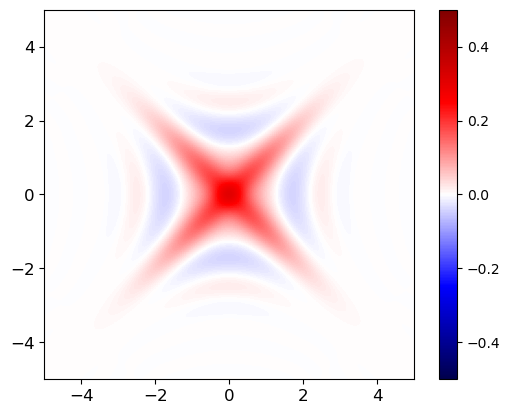

PyObject <matplotlib.colorbar.Colorbar object at 0x1977d1180>

In [18]:
PyPlot.imshow(wigner(ptrace(state_11_m[end], 2), gridvec, gridvec), cmap="seismic", vmin = -0.5, vmax=0.5, aspect="equal", extent = [-lim, lim, -lim, lim])
PyPlot.xticks(fontsize=12)#, 1.5, 2.0], fontsize=11)
PyPlot.yticks(fontsize=12)
colorbar()

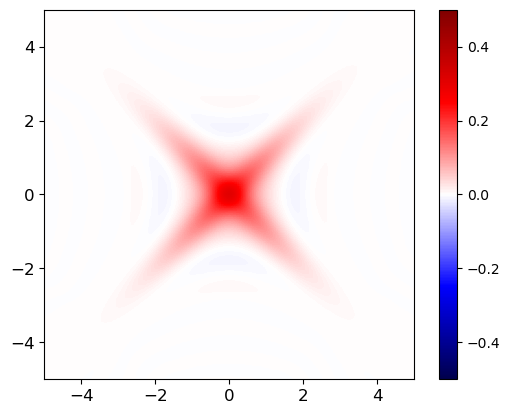

PyObject <matplotlib.colorbar.Colorbar object at 0x1978dd840>

In [19]:
imshow(wigner(ptrace(state_22_m[end], 2), gridvec, gridvec), cmap="seismic", vmin = -0.5, vmax=0.5, aspect="equal", extent = [-lim, lim, -lim, lim])
PyPlot.xticks(fontsize=12)
PyPlot.yticks(fontsize=12)
colorbar()